1. 

X is the independant variable which we input to see the predicted outcome

Y is the dependant variable that we are trying to predict using X

beta0 is the y intercept which is a constant term which shows Y when X=0

beta1 is the coefficient of X representing the slope and how much Y changes per 1 unit of X

epsilon is the error term which represents the random factors not included in the model

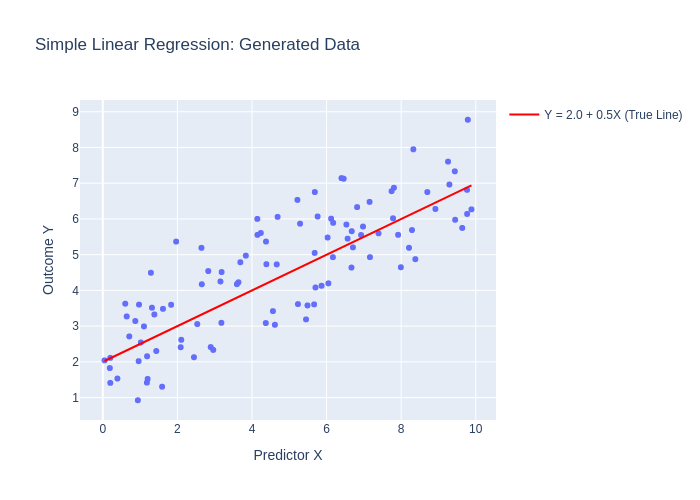

In [2]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm

# Parameters for the linear model
beta_0 = 2.0  # Intercept
beta_1 = 0.5  # Slope
sigma = 1.0   # Standard deviation of the error term

# Generating the predictor variable X
np.random.seed(0)
X = np.random.uniform(0, 10, 100)  # 100 random values between 0 and 10

# Generating the outcome variable Y with some normally distributed error
epsilon = np.random.normal(0, sigma, X.shape)  # Error term
Y = beta_0 + beta_1 * X + epsilon  # Linear relationship

# Create a DataFrame for Plotly
import pandas as pd
df = pd.DataFrame({'X': X, 'Y': Y})

# Scatter plot with Plotly Express
fig = px.scatter(df, x='X', y='Y', title='Simple Linear Regression: Generated Data',
                 labels={'X': 'Predictor X', 'Y': 'Outcome Y'})

# Add the true regression line
df['True Line'] = beta_0 + beta_1 * df['X']
fig.add_trace(go.Scatter(x=df['X'], y=df['True Line'], mode='lines', name=f'Y = {beta_0} + {beta_1}X (True Line)', line=dict(color='red')))

fig.show(renderer="png")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     200.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           2.09e-25
Time:                        20:51:34   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2222      0.193     11.496      0.0

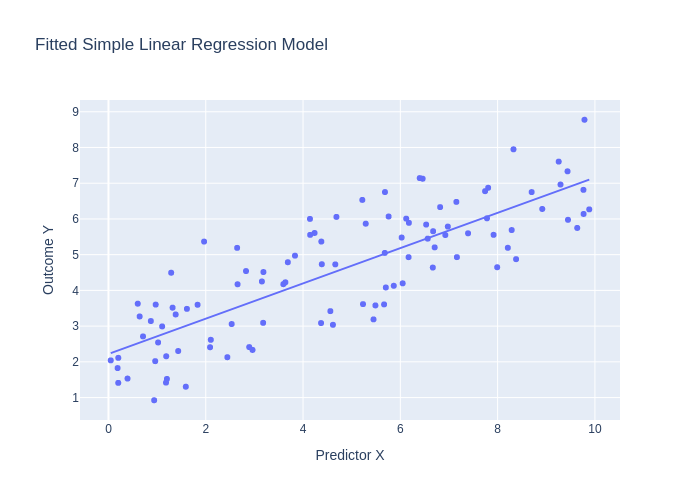

In [3]:
import pandas as pd
import statsmodels.formula.api as smf

# Create a pandas DataFrame
df = pd.DataFrame({'X': X, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model = smf.ols(formula='Y ~ X', data=df).fit()

# Print the summary of the regression results
print(model.summary())

# Extract the fitted values (predicted Y values)
df['Fitted Y'] = model.fittedvalues

# Create a scatter plot with the fitted regression line
fig = px.scatter(df, x='X', y='Y', title='Fitted Simple Linear Regression Model',
                 labels={'X': 'Predictor X', 'Y': 'Outcome Y'})

# Add the fitted regression line to the scatter plot
fig.add_trace(
    px.line(df, x='X', y='Fitted Y').data[0]
)

fig.show(renderer="png")

3.

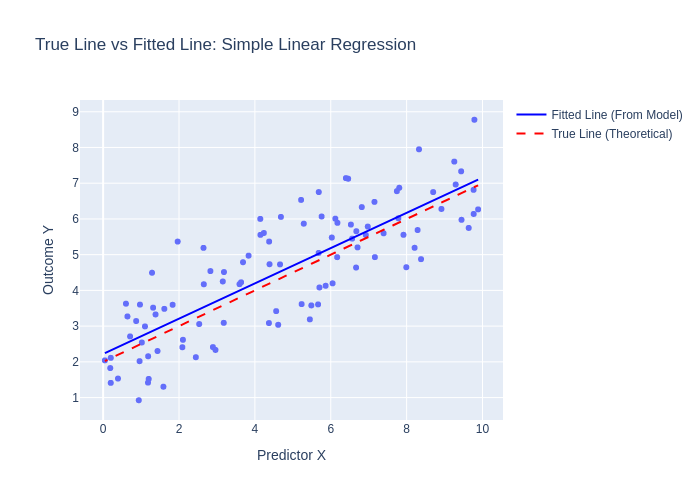

In [4]:
# Extract the fitted values (predicted Y values)
df['Fitted Y'] = model.fittedvalues

# Add the true line (Question 1) based on the known beta_0 and beta_1
df['True Line'] = beta_0 + beta_1 * df['X']

# Create a scatter plot with Plotly Express
fig = px.scatter(df, x='X', y='Y', title='True Line vs Fitted Line: Simple Linear Regression',
                 labels={'X': 'Predictor X', 'Y': 'Outcome Y'})

# Add the fitted regression line (from Question 2)
fig.add_trace(go.Scatter(x=df['X'], y=df['Fitted Y'], mode='lines', name='Fitted Line (From Model)', line=dict(color='blue')))

# Add the true line (from Question 1)
fig.add_trace(go.Scatter(x=df['X'], y=df['True Line'], mode='lines', name='True Line (Theoretical)', line=dict(color='red', dash='dash')))

fig.show(renderer="png")

the true line shows the exact theoretical relationship between X and Y without the addition of the random errors. most of the time we do not know the true line since it is based on population parameters. the fitted line represents the best estimate of the relationship between X and Y based on the sample we are given, with every different sampe the fitted line will shift.

4.

the fitted values are calculated using the estimated parameters obtained by the sample. on the table of fitted_model.summary().tables[1] it provides the estimated intercept and the estimated slope. fitted_model.params gives beta0 and beta1 which we use the the equation Y = beta0 + beta1X and fitted_model.fittedvalues are given by plugging in the X values into that formula to get the fitted line.

5.

the line chosen for the fitted model using the Ordinary least squares method is the one that has the lowest sum of the squared differences between the Y values of the given sample and the predicted Y values from the regression, the OLS subtracts the predicted Y values from the sample Y values to get the residuals and squares it to eliminate any negative values, then it is summed up and the lowest sum is chosen as the best fit for the observed data.

6.

the first expression calculates the R-squared value which measures how accurate the line is to the data points. it calculates the average variation in the outcomes. 

the second expression gives the R-squared value directly from the fitted model in statsmodel. its computed using the first expression and a higher R-squared value means higher accuracy

the third expression is the square of the correlation coefficient between the given Y values and the predicted Y values, which gives the R-squared value

the fourth expression is the square of the correlation coefficient between Y and X which can measure the proportion of variation in Y by X

7.

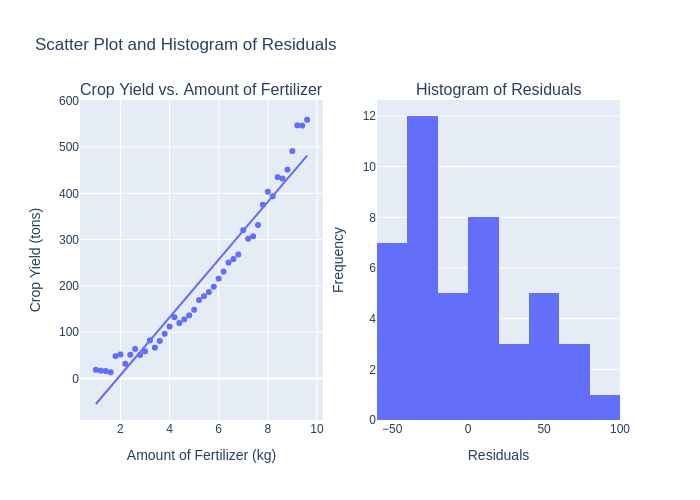

In [11]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

the simple linear regression model assumes that the relationship between X and Y is linear, however, in the scatter plot the graph seems to follow a curve instead of a straight line. another assumption is that the residuals are normally distributed, as you can see on the histogram, the residuals are not normally distributed, it seems skewed in this case it could reduce the accuracy of the linear regression model.

8.

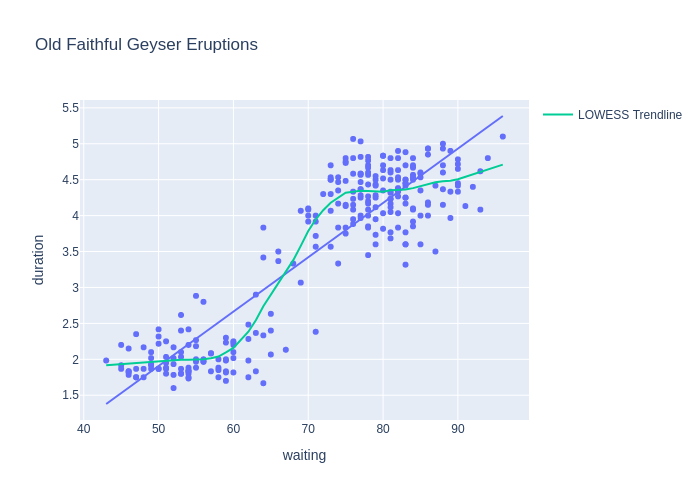

In [10]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

8.

In [8]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        20:58:12   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

a null hypothesis of " no linear association (on average)" is that the beta1 value is 0, this means that the Y value does not change with the X value hence no linear association.

the waiting coefficient is 0.0756 and the P value given by the column P>|t| is 0.000 since the p value is very low, there is very very strong evidence against the null hypothesis

9.

In [12]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


in the context of short wait times (<62) we see that the P value for the null hypothesis is 0.238 this is characterized as no evidence against the null hypothesis. compared to the unrestricted data there is no evidence for a relationship between the duration and wait time.

In [13]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit =  64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


when restricted to <64, the new P value for the null hypothesis is 0.036 which is characterized as moderate evidence against the null hypothesis. compared to the unrestricted data there is only moderate evidence for a relationship between the duration and the waiting time."

In [14]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


when restricted to <66 the P value is 0.000 this is very strong evidence against the null hypothesis which is similar to the unrestricted data which also provides very strong evidence against the null hypothesis. both provide strong evidence that there is a relationship between the duration and waiting time.

10. 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


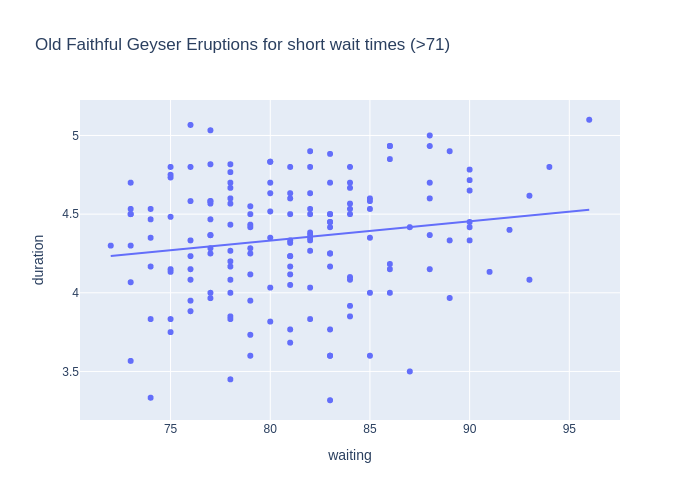

In [15]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")

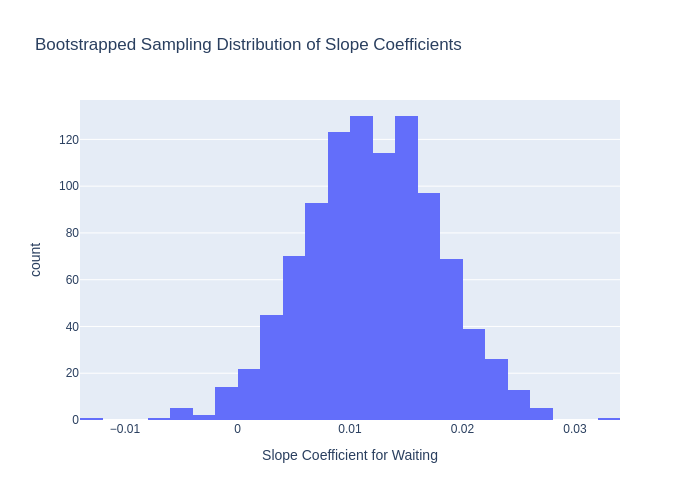

In [17]:
# Define the threshold for long wait times and filter data
long_wait_limit = 71
long_wait_data = old_faithful[old_faithful['waiting'] > long_wait_limit]

# Number of bootstrap samples
n_bootstraps = 1000
slope_coefficients = []

# Generate bootstrap samples and fit models
for _ in range(n_bootstraps):
    # Resample data with replacement
    bootstrap_sample = long_wait_data.sample(frac=1, replace=True)
    
    # Fit the model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Store the slope coefficient for 'waiting'
    slope_coefficients.append(model.params['waiting'])

# Convert to a DataFrame for easy plotting
slope_df = pd.DataFrame(slope_coefficients, columns=['slope'])

# Visualize the bootstrapped sampling distribution of the slope coefficients
fig = px.histogram(slope_df, x='slope', nbins=30,
                   title="Bootstrapped Sampling Distribution of Slope Coefficients",
                   labels={'slope': 'Slope Coefficient for Waiting'})
fig.show(renderer="png")

In [19]:
# Filter for long wait times
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
waiting_times = old_faithful[long_wait].waiting.values
n = len(waiting_times)

# True model parameters under the null hypothesis
beta0 = 1.65
beta1 = 0
sigma = 0.37

# Number of bootstrap samples
num_bootstraps = 1000
slope_coefficients = []

# Bootstrap sampling
np.random.seed(42)  # For reproducibility
for _ in range(num_bootstraps):
    # Simulate durations under the null hypothesis
    simulated_durations = beta0 + beta1 * waiting_times + np.random.normal(0, sigma, size=n)
    # Fit model and get slope coefficient
    df_simulated = pd.DataFrame({'waiting': waiting_times, 'duration': simulated_durations})
    model = smf.ols('duration ~ waiting', data=df_simulated).fit()
    slope_coefficients.append(model.params['waiting'])

# Convert to a DataFrame for easy manipulation with Plotly
slope_df = pd.DataFrame({'Slope Coefficients': slope_coefficients})

# Calculate the 95% bootstrapped confidence interval for the slope
lower_bound = np.percentile(slope_coefficients, 2.5)
upper_bound = np.percentile(slope_coefficients, 97.5)
ci_contains_zero = (lower_bound <= 0 <= upper_bound)

# Plot the distribution of bootstrapped slope coefficients using Plotly Express
fig = px.histogram(slope_df, x='Slope Coefficients', nbins=30, title='Bootstrapped Slope Coefficients under Null Hypothesis')
fig.add_vline(x=0, line_color='red', line_dash='dash', annotation_text="True Slope (0)", annotation_position="top right")
fig.add_vline(x=lower_bound, line_color='blue', line_dash='dash', annotation_text=f'95% CI Lower Bound: {lower_bound:.4f}', annotation_position="top left")
fig.add_vline(x=upper_bound, line_color='blue', line_dash='dash', annotation_text=f'95% CI Upper Bound: {upper_bound:.4f}', annotation_position="top left")

fig.update_xaxes(title_text="Slope Coefficient")
fig.update_yaxes(title_text="Frequency")
fig.show()

# Print results
print(f"95% Bootstrapped Confidence Interval for Slope: [{lower_bound:.4f}, {upper_bound:.4f}]")
print("Does the confidence interval contain 0? ", "Yes" if ci_contains_zero else "No")

# Fit the model on the actual long_wait data for comparison
model_actual = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()

# Actual slope and p-value from the real data model
actual_slope = model_actual.params['waiting']
actual_p_value = model_actual.pvalues['waiting']

# Calculate the simulated p-value (two-tailed)
simulated_p_value = np.mean(np.abs(slope_coefficients) >= abs(actual_slope))

# Compare simulated p-value with actual p-value from the model
print(f"Actual slope from OLS model: {actual_slope}")
print(f"Actual p-value from OLS model: {actual_p_value}")
print(f"Simulated p-value from bootstrapped slopes: {simulated_p_value}")

95% Bootstrapped Confidence Interval for Slope: [-0.0113, 0.0110]
Does the confidence interval contain 0?  Yes
Actual slope from OLS model: 0.012244029446523483
Actual p-value from OLS model: 0.038135755338567744
Simulated p-value from bootstrapped slopes: 0.029


0 is containted in the 95% bootstrapped confidence interval but the p value does not match

11.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


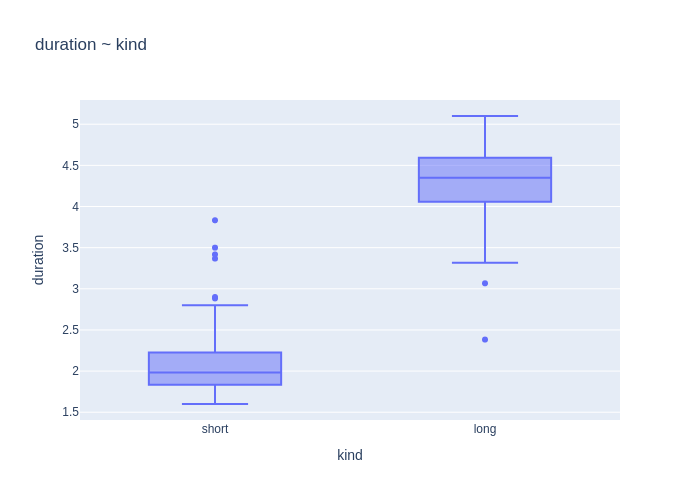

In [21]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

In [22]:
import statsmodels.formula.api as smf

# Define the threshold for short and long wait times
short_wait_limit = 68
short_wait = old_faithful.waiting < short_wait_limit
long_wait = old_faithful.waiting >= short_wait_limit

# Create a new column to represent the indicator variable for 'long' wait times
old_faithful['long_wait'] = long_wait.astype(int)

# Fit the model using the indicator variable for 'long' wait times
model = smf.ols('duration ~ long_wait', data=old_faithful).fit()

# Display the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        22:32:42   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0943      0.041     50.752      0.0

the differences between the new model and the old models is that the new model splits the waiting time into 2, either short or long and compares the duration of both catagories. the old model is continuous and has waiting time bins along the x axis to show the shape of the distribution. the new models null hypothesis is that there is no difference between the groups on average and has a P value of 0.000 which is very strong evidence against the null hypothesis. this means there is a large average difference between durations of the short and long wait times.

12.

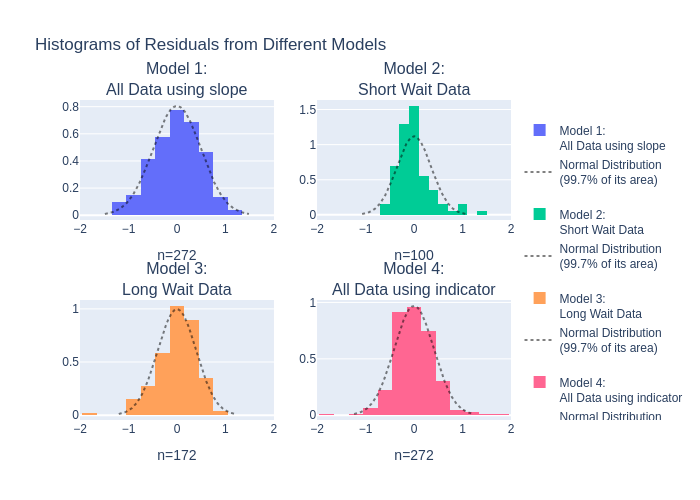

In [26]:

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

model is the most plausible in my opinion since it closely follows the normal distribution and does not have any outliers. model 2 seems slightly right skewed, model 3 seems slightly left skewed and model 4 contains outliers

In [28]:
short_group = old_faithful[old_faithful['waiting'] < 68]['duration']
long_group = old_faithful[old_faithful['waiting'] >= 68]['duration']

# Calculate the observed difference in means
observed_diff = short_group.mean() - long_group.mean()

# Combine the data
combined_data = np.concatenate([short_group, long_group])

# Initialize a list to store differences from shuffled data
shuffled_diffs = []

# Number of permutations
n_permutations = 10000

# Perform the shuffling
for _ in range(n_permutations):
    np.random.shuffle(combined_data)  # Shuffle the combined data
    # Split the shuffled data into short and long groups
    shuffled_short = combined_data[:len(short_group)]
    shuffled_long = combined_data[len(short_group):]
    shuffled_diffs.append(shuffled_short.mean() - shuffled_long.mean())

# Calculate p-value
p_value = np.mean(np.abs(shuffled_diffs) >= np.abs(observed_diff))
print(f"P-value: {p_value}")


n_bootstrap = 10000

# Initialize a list to store bootstrap differences
bootstrapped_diff = []

# Perform the bootstrap
for _ in range(n_bootstrap):
    # Resample with replacement
    boot_short = np.random.choice(short_group, size=len(short_group), replace=True)
    boot_long = np.random.choice(long_group, size=len(long_group), replace=True)
    # Calculate the mean difference
    bootstrapped_diff.append(boot_short.mean() - boot_long.mean())

# Calculate the 95% confidence interval
ci_lower, ci_upper = np.quantile(bootstrapped_diff, [0.025, 0.975])
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

P-value: 0.0
95% Confidence Interval: (-2.2985345523255822, -2.1018180581395347)


(a)

the permutation test reshuffles the data labels to simulate what the data would look like under the null hypothesis, by doing this we can get a distribution of differences in means and compare the observed difference to the distribution since the P value is 0 there is very strong evidence against the null hypothesis.

the bootstrap method samples from the observed data with replacement to estimate the sampling distribution of the difference in means. then we can estimate how much the difference in means varies due to random sampling from this we can compute a confidence interval to estimate the range of differences in means between both groups

(b)

the indicator variable model from question 11 splits the waiting times into either short or long. all 3 methods compare the means of the two groups, though the bootstrap and permutation tests both include resampling, the indicator variable model compares the 2 means directly, both the permutation test and bootstrap method are used to test a null hypothesis.

14. somewhat

chatbot summary: 

 Here's a summary of our session:

1. Understanding Model Specifications and Hypothesis Testing
We discussed different model specifications used in regression analysis, such as simple linear regression and models with indicator variables (for short vs. long wait times).
You learned about the difference between continuous models (which use variables like "waiting" directly) and models using categorical variables (like "short" and "long" wait times).
We also covered how p-values and R-squared values are used to assess the strength and fit of models, with a focus on comparing models that use continuous predictors versus categorical ones.
2. Bootstrapping and Permutation Testing
We introduced bootstrapping, which involves resampling data with replacement to estimate confidence intervals or simulate sampling distributions.
You also explored the concept of permutation tests, which test the null hypothesis by randomly shuffling data labels and calculating the test statistic multiple times to generate a distribution under the null hypothesis.
You compared these methods in the context of hypothesis testing for differences between groups (e.g., short vs. long wait times).
3. Visualizing and Interpreting Model Residuals
We discussed the importance of residuals in regression analysis and how to visualize them using histograms and plots.
The histograms helped you assess whether the assumption of normally distributed error terms is reasonable for different models. You also learned how to interpret the shape of residuals and the role they play in validating a regression model.
4. Confidence Intervals and Model Evaluation
In the context of hypothesis testing, we looked at the 95% bootstrap confidence interval and its significance in assessing whether there is a meaningful difference between groups (short vs. long wait times).
We explored how to interpret the confidence interval: if the interval includes zero, it suggests no difference between groups, and if it doesn't, it suggests a significant difference.
5. Statistical Methods in Practice
You applied statistical methods to the Old Faithful Geyser dataset, running linear regression models and hypothesis tests to explore the relationship between waiting times and eruption durations.
We also reviewed the use of indicator variables to represent categorical data and tested whether these provided significant insights into the data.
In conclusion, the session provided you with an overview of how to apply linear regression, hypothesis testing, bootstrapping, and permutation testing to real-world data, particularly focusing on the practical implications of statistical methods like confidence intervals and p-values in model interpretation and evaluation.

chatbot link: https://chatgpt.com/share/672bff75-5f7c-8008-9e6e-e02795e5120d